In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

In [123]:
#Importing CSV
df = pd.read_csv('species.csv', sep=",")

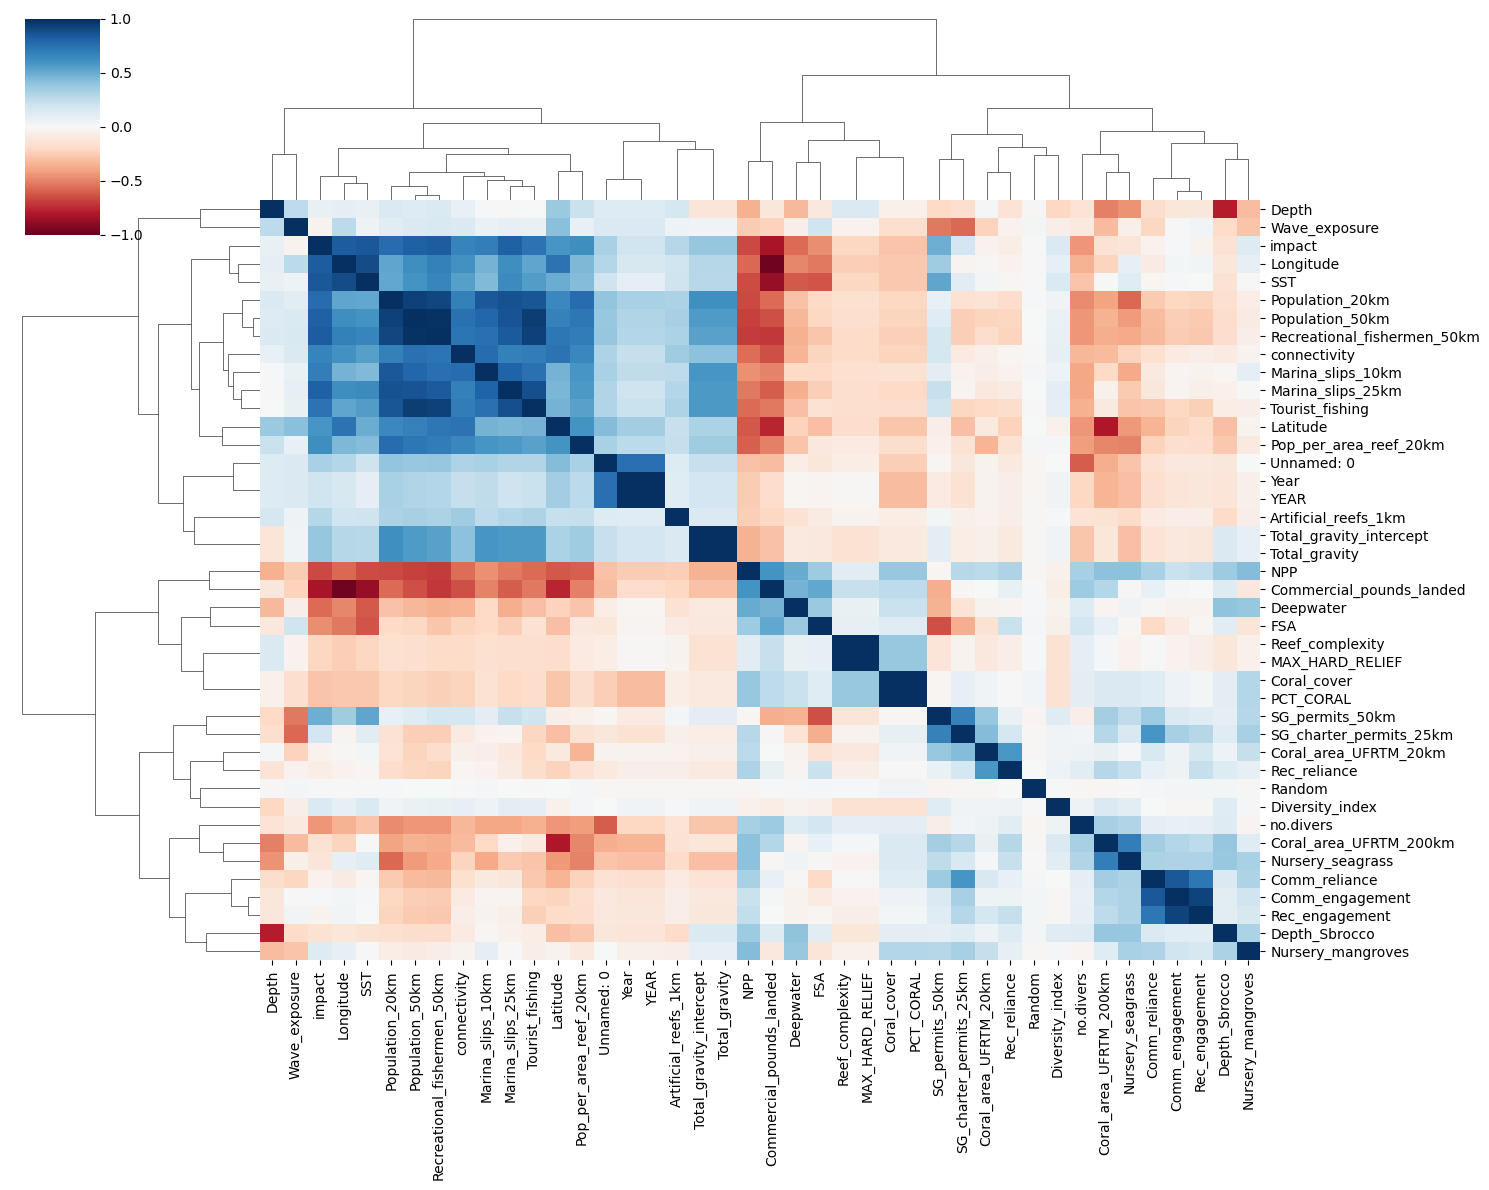

In [124]:
#Step 1

dissimilarity = 1 - abs(df.corr(numeric_only=True))
Z = linkage(squareform(dissimilarity), 'complete')

#Step 2

threshold = 0.5
labels = fcluster(Z, threshold, criterion='distance')

#Step 3

# Keep the indices to sort labels
labels_order = np.argsort(labels)


#Step 4

# Build a new dataframe with the sorted columns
for idx, i in enumerate(df.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(df[i])
    else:
        df_to_append = pd.DataFrame(df[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

        
correlations = df.corr(numeric_only=True)
sb.clustermap(correlations, method="complete", cmap='RdBu', annot=False, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));

### Location of the sites
* Analysis by the Region


In [125]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name = "Region", color="Region",
                        color_discrete_sequence=["Red", "Green", "Blue"], zoom=5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### How closeness to mainland affect Coral_cover and Reef_complexity

In [126]:
df.groupby("Region").mean(numeric_only = True)[["Coral_cover", "Reef_complexity"]]

#DRY TORT: Far from mainland
#FLA KEYS: In between
#SEFCRI: Close to mainland

,Coral_cover,Reef_complexity
Region,,
DRY TORT,6.591833,1.473544
FLA KEYS,4.803541,1.067548
SEFCRI,2.023241,0.847077


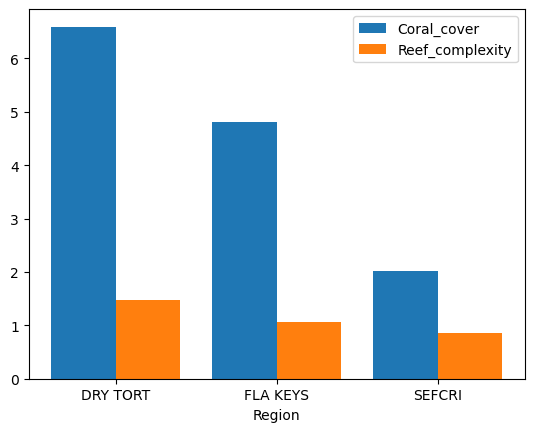

In [127]:
x = df.groupby("Region").count().index

y1 = df.groupby("Region").mean(numeric_only = True)["Coral_cover"]
y2 = df.groupby("Region").mean(numeric_only = True)["Reef_complexity"]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label = "Coral_cover")
plt.bar(x_axis + 0.2, y2, 0.4, label = "Reef_complexity")


plt.xticks(x_axis, x)
plt.xlabel("Region")
plt.ylabel("")
plt.legend()

### Data Imbalance

Region
FLA KEYS    1912
SEFCRI      1430
DRY TORT     657
Name: count, dtype: int64

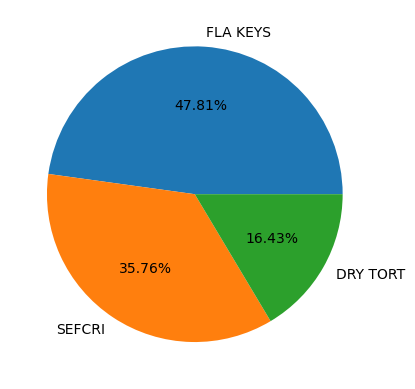

In [128]:
def get_percentage(num):
    prct = ("%.2f" % num)
    prct += "%"
    return prct

plt.pie(df.Region.value_counts(), labels = df.Region.value_counts().index, autopct = get_percentage)
df.Region.value_counts()

#### Conclusion:
The closer to mainland, the less coral_cover and reef_complexity  

### How temperature relates to Region

In [129]:
df.SST.describe()

count    3999.000000
mean       23.760696
std         0.552442
min        22.405206
25%        23.608484
50%        23.929285
75%        24.200861
max        24.436212
Name: SST, dtype: float64

In [130]:
df.groupby(df.Region).SST.mean()

Region
DRY TORT    22.694389
FLA KEYS    23.876906
SEFCRI      24.095222
Name: SST, dtype: float64

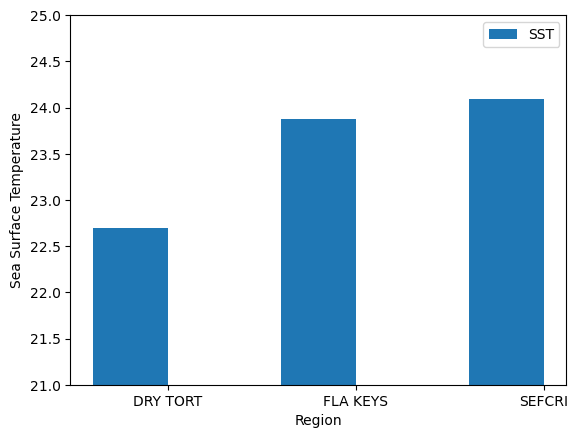

In [131]:
x = df.groupby("Region").count().index
y1 = df.groupby("Region").mean(numeric_only = True)["SST"]
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, y1, 0.4, label = "SST")

plt.xticks(x_axis, x)
plt.xlabel("Region")
plt.ylabel("Sea Surface Temperature")
plt.ylim(21, 25)
plt.legend()

## Conclusion:
When far from mainland, the lower the temperature.

* A warming ocean: causes thermal stress that contributes to coral bleaching and infectious disease.

## Analysis by Keys_Divisions

Sub-juristictions

Possible NA Value: All the SEFCRI probably have the value "Upper Keys" as they are all located in the upper part of the map.



In [132]:
# 1429 values missing for Keys_Divisions
print(df.Keys_Divisions.isna().sum())

# 1430 values for region "SEFCRI"
print(df.loc[df.Region == "SEFCRI", "Region"].count())

# Only one value for Upper Keys for SEFCRI
df.groupby(["Region", "Keys_Divisions"]).mean(numeric_only=True)[["Coral_cover", "Reef_complexity"]]
df[["Region", "Keys_Divisions"]].value_counts()

#Since SEFCRI are all located in the upper part of the map, they should have the value Upper Keys too

1429
1430


Region    Keys_Divisions
FLA KEYS  Upper Keys        936
DRY TORT  Dry Tortugas      657
FLA KEYS  Lower Keys        486
          Middle Keys       284
          Marquesas         206
SEFCRI    Upper Keys          1
Name: count, dtype: int64

In [133]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name = "Keys_Divisions", color="Keys_Divisions",
                        color_discrete_sequence=["Red", "Green", "Blue", "Yellow", "Pink", "Orange"], zoom=5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

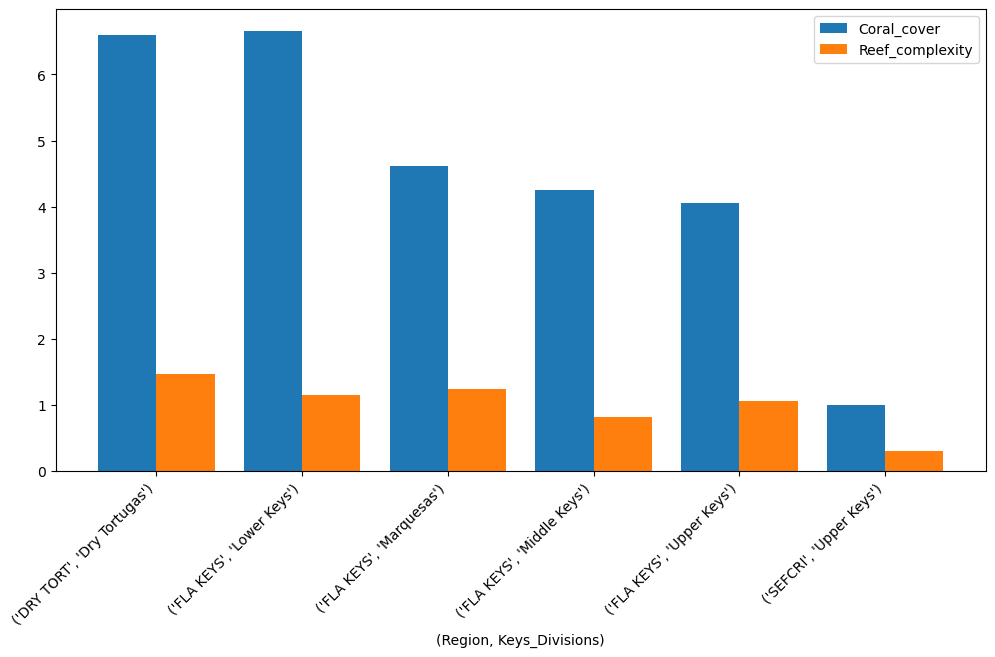

In [134]:
x = df.groupby(["Region", "Keys_Divisions"]).mean(numeric_only=True).index

y1 = df.groupby(["Region", "Keys_Divisions"]).mean(numeric_only = True)["Coral_cover"]
y2 = df.groupby(["Region", "Keys_Divisions"]).mean(numeric_only = True)["Reef_complexity"]

x_axis = np.arange(len(x))


plt.figure(figsize=(12, 6))  # Adjust the figure size

plt.bar(x_axis - 0.2, y1, 0.4, label = "Coral_cover")
plt.bar(x_axis + 0.2, y2, 0.4, label = "Reef_complexity")


plt.xticks(x_axis, x, rotation=45, ha='right')  # Rotate the x-axis labels

plt.xticks(x_axis, x)
plt.xlabel("(Region, Keys_Divisions)")
plt.ylabel("")
plt.legend()

### NPP analysis

NPP: measures the amount of carbon that marine primary producers (like phytoplankton) fix through photosynthesis minus the amount of carbon they respire.

Reduction in NPP:

* Population Declines: Species that rely on primary producers for food may experience population declines due to reduced food availability.
* Biodiversity Loss: Reduced NPP can lead to a decrease in biodiversity as species that cannot adapt to the reduced food supply may become extinct.
* Dead Zones: A decrease in NPP can disrupt the balance of nutrient inputs and outputs, potentially leading to the formation of hypoxic or anoxic zones (areas with low or no oxygen), commonly referred to as dead zones.

Human activety negatively and directly impact NPP

In [135]:
#Human activety have direct negative impact on the NPP
df[["NPP", "Recreational_fishermen_50km", "Tourist_fishing", "Marina_slips_10km", "Marina_slips_25km", "Population_20km", "Population_50km", "Pop_per_area_reef_20km", "impact", "Total_gravity"]].corr()

,NPP,Recreational_fishermen_50km,Tourist_fishing,Marina_slips_10km,Marina_slips_25km,Population_20km,Population_50km,Pop_per_area_reef_20km,impact,Total_gravity
NPP,1.000000,-0.698740,-0.568514,-0.456257,-0.528332,-0.657658,-0.680565,-0.599619,-0.663904,-0.345821
Recreational_fishermen_50km,-0.698740,1.000000,0.935525,0.752958,0.840729,0.911245,0.990503,0.695713,0.832204,0.541726
Tourist_fishing,-0.568514,0.935525,1.000000,0.747682,0.880633,0.858300,0.949199,0.541606,0.741886,0.576107
Marina_slips_10km,-0.456257,0.752958,0.747682,1.000000,0.806750,0.845208,0.795105,0.593063,0.690361,0.590499
Marina_slips_25km,-0.528332,0.840729,0.880633,0.806750,1.000000,0.871212,0.863282,0.576321,0.817805,0.571527
Population_20km,-0.657658,0.911245,0.858300,0.845208,0.871212,1.000000,0.937152,0.770780,0.770920,0.610837
Population_50km,-0.680565,0.990503,0.949199,0.795105,0.863282,0.937152,1.000000,0.726339,0.817650,0.562799
Pop_per_area_reef_20km,-0.599619,0.695713,0.541606,0.593063,0.576321,0.770780,0.726339,1.000000,0.619547,0.357202
impact,-0.663904,0.832204,0.741886,0.690361,0.817805,0.770920,0.817650,0.619547,1.000000,0.389253
Total_gravity,-0.345821,0.541726,0.576107,0.590499,0.571527,0.610837,0.562799,0.357202,0.389253,1.000000


How does NPP relates to Coral_cover and Reef_complexity

#### Impact of Reduced NPP

- Coral Bleaching: Elevated sea temperatures can cause corals to expel their zooxanthellae, leading to reduced NPP, coral bleaching, and potentially coral death if the stress persists.

- Loss of Coral Coverage: Reduced NPP impacts the energy available for corals to grow and repair, leading to decreased coral coverage and compromised reef structures.

- Decreased Reef Complexity: With lower coral coverage and health, the structural complexity of reefs declines, reducing habitat availability and biodiversity.

In [136]:
df[["NPP", "Coral_cover", "Reef_complexity"]].corr()

,NPP,Coral_cover,Reef_complexity
NPP,1.000000,0.378863,0.115232
Coral_cover,0.378863,1.000000,0.381732
Reef_complexity,0.115232,0.381732,1.000000


#### Conclusion: 
Increased human activety -> Reduces NPP -> Contributes to reduction of Coral cover and Reef Complexity